# Stochastic Gradient Descent 隨機梯度下降

這個方法在深度學習(deep learning)求解 weight 裡面也是常用的手法，我們這一次會講解他的原理以求解線性模型為例，
對他的原理有所了解對於以後去學習深度學習的模型會更快上手，如果有想要往(deep learning)這領域又覺得不得其門而入，
這一次要學習的內容是一個很好的起點。

## optimization

在介紹之前，我們先介紹找解的兩種方法，一種是直接找出問題的解，

- 例 1 : 解 2 元 1 次 方程式
$$
a x^2 + bx + c = 0
$$
解是 
$$
\frac{-b \pm \sqrt{b^2 -4ac}}{2a}
$$
或是
- 例 2 : 求 $f(x) = a x^2 + b x + c$ 的極值。
我們知道可以靠微積分，求微分為零的地方，帶進去就是候選的解。

但是我們人生的很多面對的問題是無法直接給出解答的，所以我們會退而求其次用啟發式算法(heuristic algorithm)，在深度學習的問題上，
要直接給出最優解釋非常困難的，SGD的算法是常見的一種解法，

## heuristic

就算我們打算用啟發式的算法，這種退一步的算法，那該怎麼做啊!! <br>
其實在我們人生中也常用這種算法，當你被老闆交代一個任務，你沒有經驗，那該怎麼做，你可以隨便開始用一個方法，做就對了，之後開始檢討改進，我們只要不停地改進就能越做越好，
這種想法就是SGD的做法，我們如果要求某個函數的極值，我們就先隨機開始，再不停的找更好的解。

## calculus 微積分

假設我們現在已經理解 SGD 的想法，但是我們怎麼改進不停進步，在現實的工作如果你沒有經驗你需要不停的試錯，如果你有以前的經驗，你可以用你以前的工作經驗來找可能更好的方法，
但是在資料分析領域，你千萬不要忘記你大學的微積分老師，你學習的微積分在這邊會提供你往更好解的方向，我們下面看一個求極值的例子。

$$
f(x) = x^3 - 10 x^2 - x - 1
$$


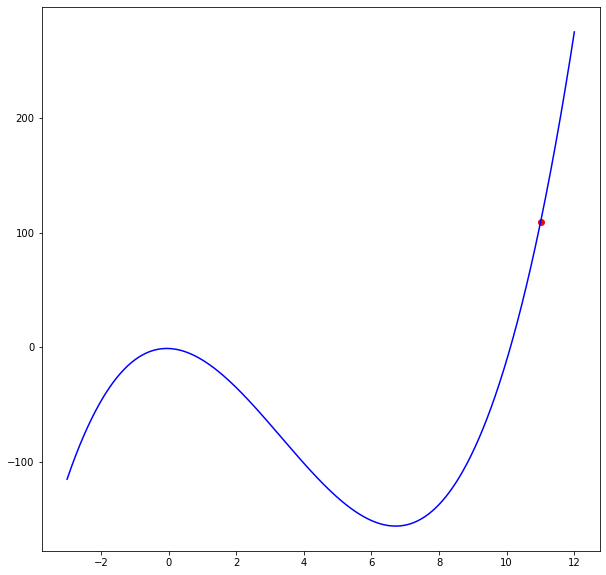

In [20]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 10]

x = np.linspace(-3, 12, 1024) 
y = x**3 - 10 * x**2 - x - 1

plt.plot(x, y, c = 'b') 
plt.scatter(11, 11**3 - 10*11**2 - 11 - 1, c='r')
plt.show()



假設我們隨機選的 $x=11$如果我們想找更小的值，我們該往左找還是往右找?

## learning rate 步長

對的微積分會跟我們說，你為什麼不看看那個點的微分阿。
$$
\begin{align*}
f'(x)  &= 3x^2 - 20x - 1 \\
f'(11) &= 142 > 0
\end{align*}
$$

微分大於 $0$，代表往右函數值是變大，往左函數值是變小，所以我們要找更小的值要往左找。

$$
x_{new} = x_{old} - lr * f'(x_{old})
$$

其中的 $lr$ 是我們要往左走多長，這個 learning rate 的更新與找法在深度學習的調參是一個很重要的問題，但是這不是我們今天要談論的重點，下面來看如果我們是更高維度的函數該怎麼找更好的解。

$$
x_{new} = x_{old} - lr * \nabla f(x_{old})
$$

其中的 $\nabla f$ 是函數的梯度 (Gradient) ，就是高維度的微分，如果你都忘光光，你的微積分老師在哭泣，所以這個找極值的方法稱為 SGD 。




## Example

我以後是打算教深度學習的，但是如果一開始就把問題便很難，對於理解其中的原理很不好，
所以我打算重新解一次線性回歸，但是這一次我們要讓你們的統計老師哭泣，統計學有過你們直接求解的方法，我們也在之前的線性模型提過，
但是這一次我們要用 SGD 的方法再解一次相同的問題。

### 問題描述
假設我們有 $x_1, \cdots, x_n$ 與 $y_1, \cdots, y_n$，我們想要找到，斜率 $a$ 與 截距 $b$ 去估計 $y$
$$
a x + b \sim y
$$
等於我們要去解
$$
\min_{a,b} \frac{1}{n} \sum_i (y_i - (ax_i+b))^2
$$
令
$$
f(a,b) = \frac{1}{n} \sum_i (y_i - (ax_i+b))^2
$$
下面來求微分
$$
\begin{align*}
\frac{\partial f}{\partial a} &= \frac{1}{n} \sum_i 2 (y_i - (ax_i+b)) (-x_i)\\
\frac{\partial f}{\partial b} &= \frac{1}{n} \sum_i 2 (y_i - (ax_i+b))
\end{align*}
$$

所以我們可以隨機給定 $a, b$ 再去更新 $a,b$去找到更好的解，下面我們用python去實做 SGD ，大家看看就好，重在理解，不用手刻 SGD ，現在很多套件都做掉這一塊了。



iter=0 a=1.45 b=4.0711 cost=2.5
iter=10 a=1.65 b=4.1369 cost=1.0
iter=20 a=1.64 b=4.1699 cost=1.0
iter=30 a=1.64 b=4.2013 cost=1.0


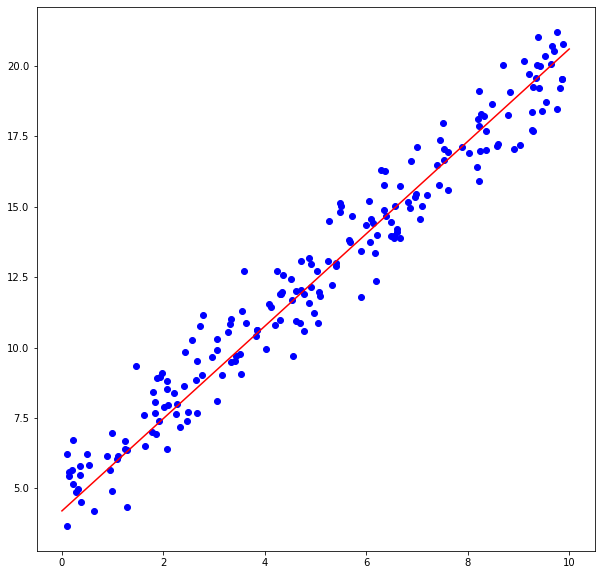

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 10]


def update_ab(x, y, a, b, learning_rate):
    a_deriv = 0
    b_deriv = 0
    n = len(x)
    for i in range(n):
        # -2 x (y - (a x + b))
        a_deriv += -2*x[i] * (y[i] - (a*x[i] + b))
        # -2   (y - (a x + b))
        b_deriv += -2*(y[i] - (a*x[i] + b))
    # SGD rule
    a -= (a_deriv / n) * learning_rate
    b -= (b_deriv / n) * learning_rate
    return a, b

def cost_function(x, y, a, b):
    n = len(x)
    total_error = 0.0
    for i in range(n):
        total_error += (y[i] - (a*x[i] + b))**2
    return total_error / n


def train(x, y, a, b, learning_rate, iters):
    cost_history = []
    for i in range(iters):
        a, b = update_ab(x, y, a, b, learning_rate)
        cost = cost_function(x, y, a, b)
        cost_history.append(cost)
        
        if i % 10 == 0:
            print("iter={:d} a={:.2f} b={:.4f} cost={:.2}".format(i, a, b, cost))
    return a, b, cost_history



rands = np.random.RandomState(87)
x = 10 * rands.rand(200)
y = 1.5 * x + 5 + rands.randn(200)
plt.scatter(x, y, c = 'b')

_,_,_ = train(x, y, a=1, b=4, learning_rate=0.01, iters=31)

x = np.linspace(0,10,100)
y = 1.64*x + 4.2013

plt.plot(x, y, c = 'r') 
plt.show()



# 相信大家都了解了非常多，對於以後學習更深的內容有堅實的基礎，我們接下來要進入 scikit learn 裡面的 SGD 的方法。